In [1]:
from common import *

In [11]:
# Load dataset
def gen_data():
    for classifier in ['DL (Drift)', 'Statistical']:
        exp_path = ROC_PATH / classifier.split()[0]
        for exp, setting in zip([exp_path / 'two2one' / 'case1', exp_path / 'two2one' / 'case2'],
                                ['two-to-one (semi-matched)', 'two-to-one (unmatched)']):
            if setting == 'baseline':
                if classifier.startswith('DL'):
                    exp = exp / 'drift'
            else:
                if classifier.startswith('Stat'):
                    exp = exp / '2parties'
            item = pd.read_csv(exp / f'subsampled_ROC_100.txt', sep=' ', names=['TPR', 'FPR'])
            item['Classifier'] = classifier
            item['Setting'] = setting
            yield item
            
data = pd.concat(gen_data()).reset_index(drop=True)

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `two2one-crop.pdf'.


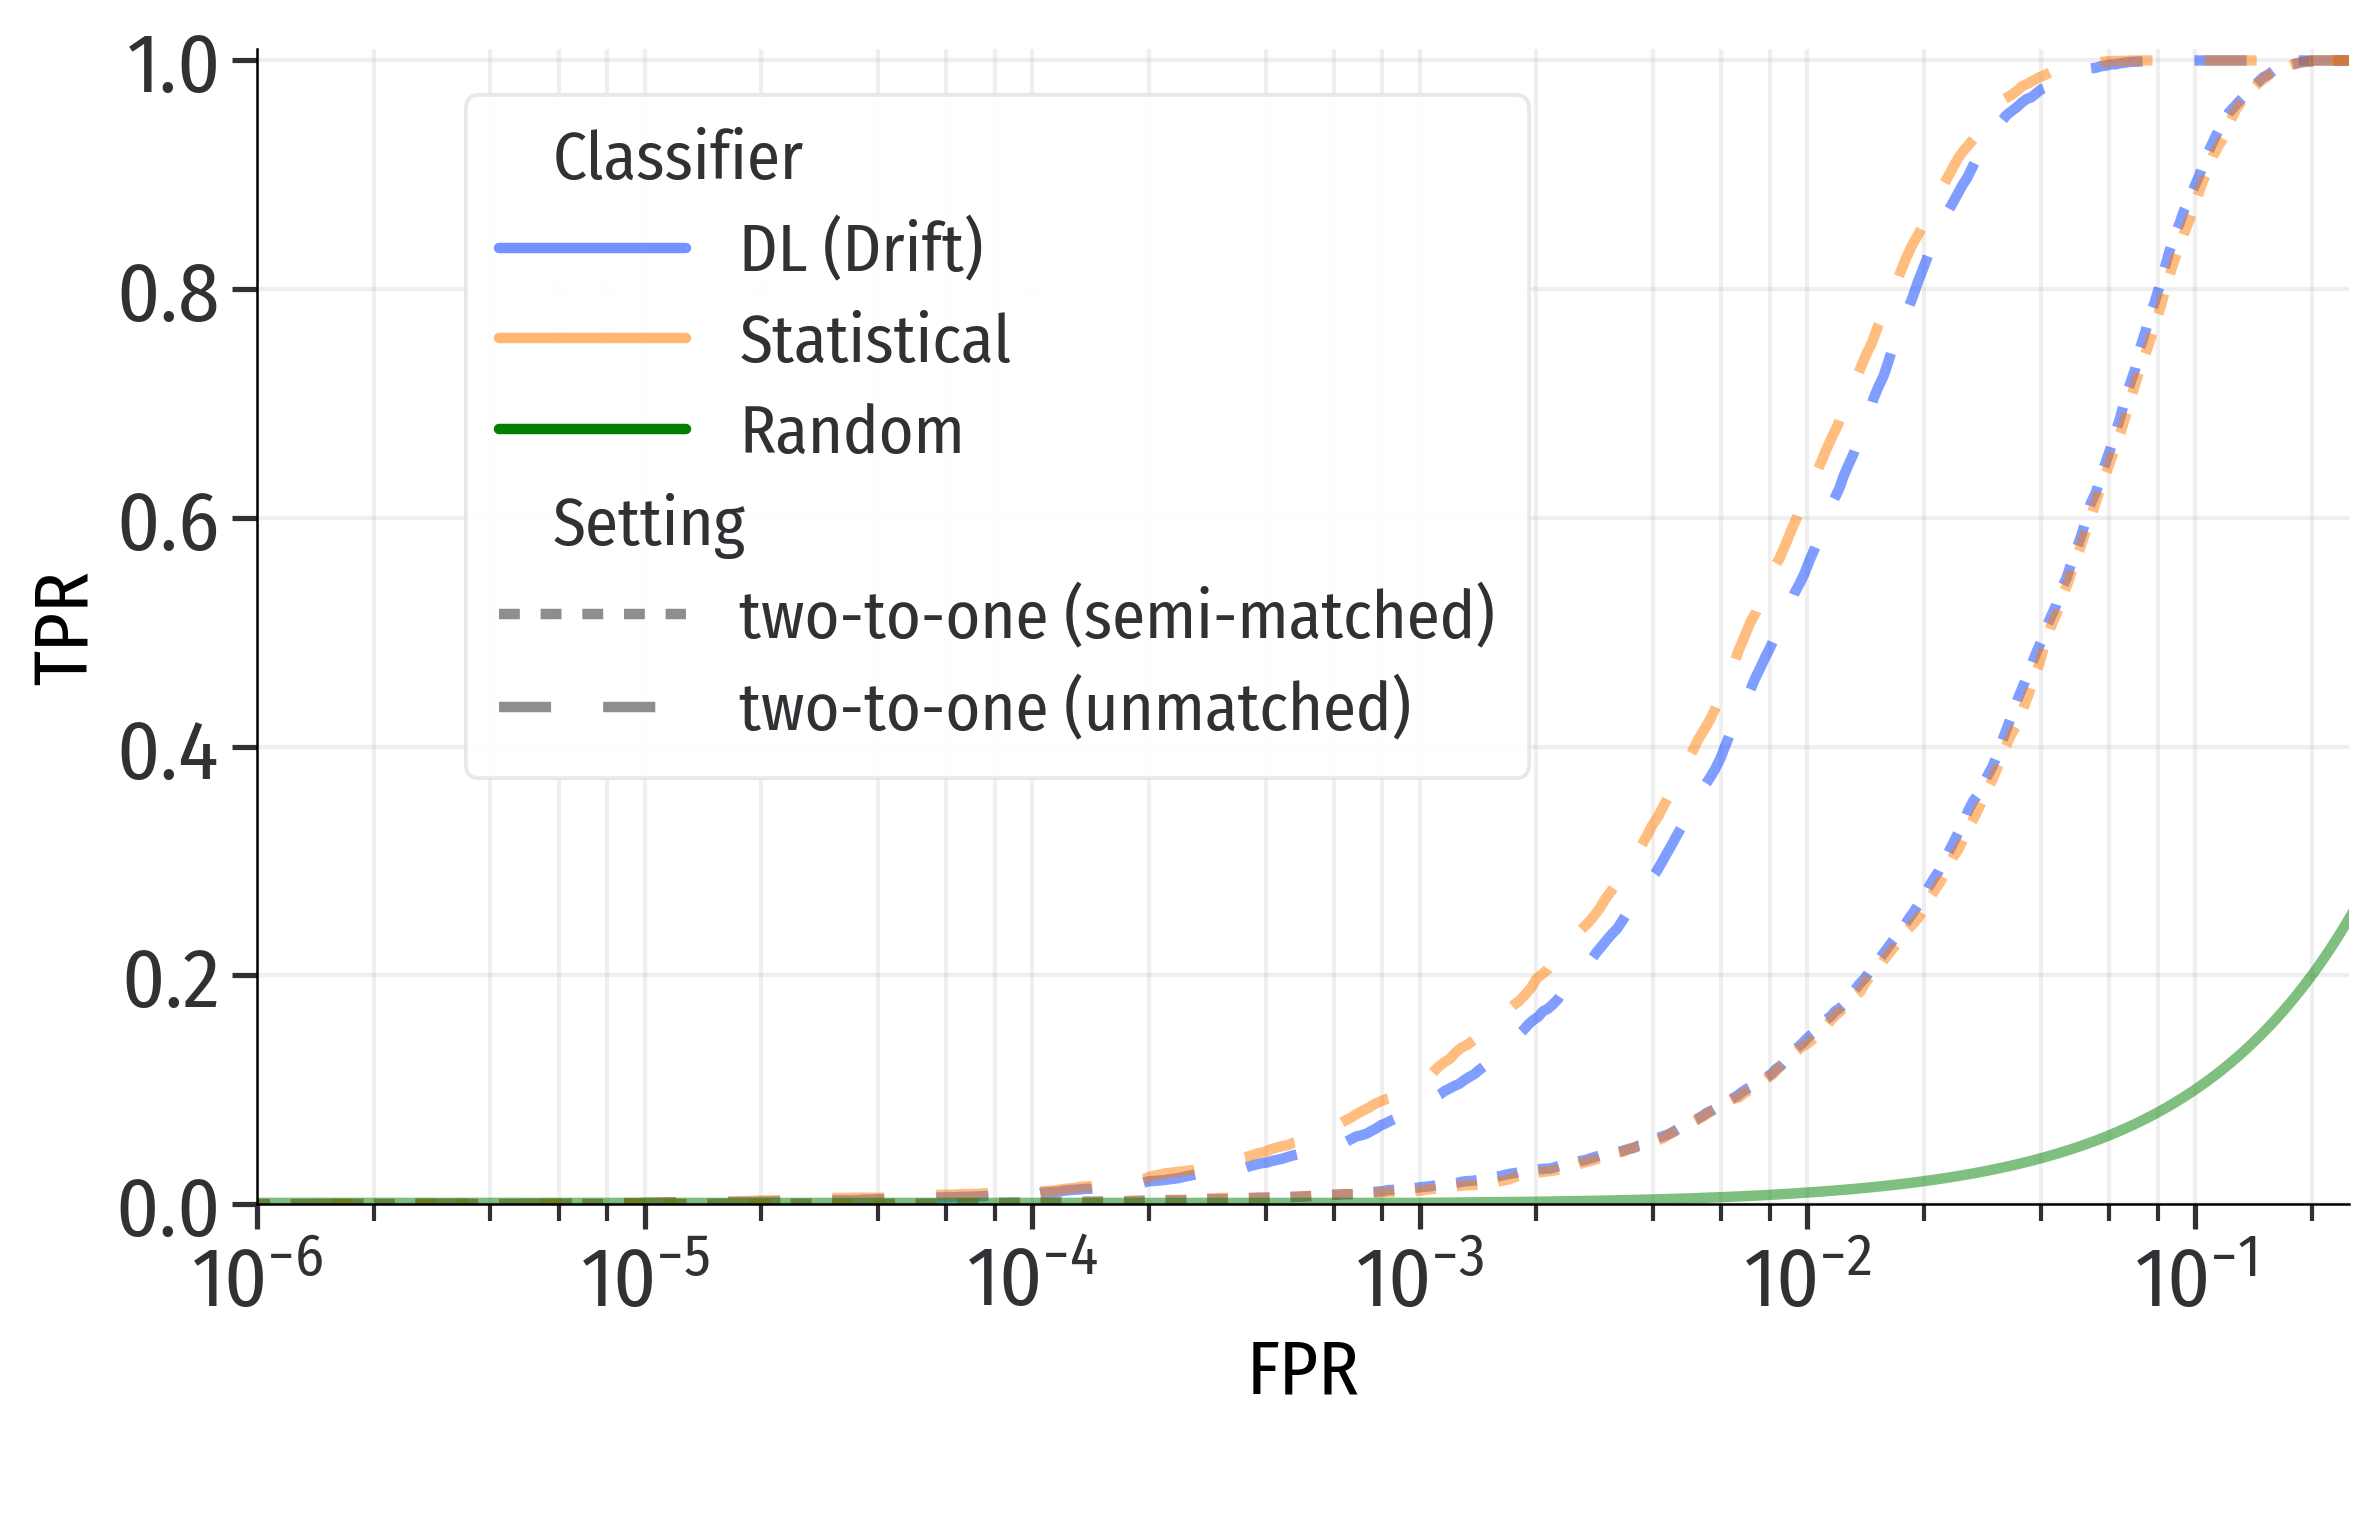

In [14]:
fig = plt.gcf()
fig.set_size_inches(SIZE_W, SIZE_H)

g = sns.lineplot(data=data, x='FPR', y='TPR', style='Setting', hue='Classifier', dashes=dashes22, legend='full', ci=None, palette='bright')

plot_random_classifier(g)
set_log_scale(g)

# custom legend
handles, labels = g.get_legend_handles_labels()
handles.insert(3, Line2D([0],[0], color="green",))
labels.insert(3, 'Random')
windows_leg = plt.legend(handles=handles,
                         labels=labels,
                         bbox_to_anchor=(0.1, 0.96),
                         loc='upper left',
                         borderpad=0.5,
                         ncol=1)
g.add_artist(windows_leg)

for vpack in windows_leg._legend_handle_box.get_children():
    vpack.get_children()[0].get_children()[0].set_width(0)
    vpack.get_children()[4].get_children()[0].set_width(0)

save_fig('two2one')